# Bayesian Linear Regression
https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-2-b72059a8ac7e

http://localhost:8888/notebooks/DS_Projects/Machine-Learning-Examples/bayesian_example.ipynb

In [46]:
# pandas and numpy because they're the OGs
import pandas as pd
import numpy as np

# Graphin'!
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Something
from sklearn.model_selection import train_test_split

## Read in data and Examine

In [16]:
df = pd.read_csv('student-mat.csv',sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      357 non-null    object
 1   sex         357 non-null    object
 2   age         357 non-null    int64 
 3   address     357 non-null    object
 4   famsize     357 non-null    object
 5   Pstatus     357 non-null    object
 6   Medu        357 non-null    int64 
 7   Fedu        357 non-null    int64 
 8   Mjob        357 non-null    object
 9   Fjob        357 non-null    object
 10  reason      357 non-null    object
 11  guardian    357 non-null    object
 12  traveltime  357 non-null    int64 
 13  studytime   357 non-null    int64 
 14  failures    357 non-null    int64 
 15  schoolsup   357 non-null    object
 16  famsup      357 non-null    object
 17  paid        357 non-null    object
 18  activities  357 non-null    object
 19  nursery     357 non-null    object
 20  higher    

In [17]:
df.shape

(395, 33)

In [18]:
# filter out grades that were 0
df = df[~df['G3'].isin([0,1])]
df = df.rename(columns={'G3':'Grade'})
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [19]:
df.shape

(357, 33)

## Exploratory Data Analysis

### Describe for Numerical Columns

In [20]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.268908,11.358543,11.523810
std,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.240450,3.147188,3.227797
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,5.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000,9.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Value Counts for Categorical Columns

In [21]:
# print the value counts for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:',col)
        print(df[col].value_counts())


Column Name: school
GP    315
MS     42
Name: school, dtype: int64

Column Name: sex
F    185
M    172
Name: sex, dtype: int64

Column Name: address
U    279
R     78
Name: address, dtype: int64

Column Name: famsize
GT3    250
LE3    107
Name: famsize, dtype: int64

Column Name: Pstatus
T    318
A     39
Name: Pstatus, dtype: int64

Column Name: Mjob
other       127
services     94
teacher      54
at_home      50
health       32
Name: Mjob, dtype: int64

Column Name: Fjob
other       196
services    100
teacher      26
health       18
at_home      17
Name: Fjob, dtype: int64

Column Name: reason
course        126
reputation     99
home           97
other          35
Name: reason, dtype: int64

Column Name: guardian
mother    248
father     82
other      27
Name: guardian, dtype: int64

Column Name: schoolsup
no     307
yes     50
Name: schoolsup, dtype: int64

Column Name: famsup
yes    219
no     138
Name: famsup, dtype: int64

Column Name: paid
no     184
yes    173
Name: paid, dty

### Distribution of Grades

In [22]:
df['Grade'].describe()

count    357.000000
mean      11.523810
std        3.227797
min        4.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: Grade, dtype: float64

In [25]:
df['Grade'].value_counts(sort=False)

4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: Grade, dtype: int64

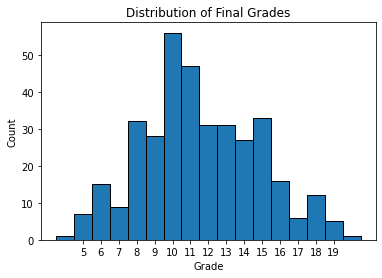

In [30]:
# bar plot of grades
plt.bar(df['Grade'].value_counts().index,
        df['Grade'].value_counts().values,
        fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Grade');
plt.ylabel('Count');
plt.title('Distribution of Final Grades');
plt.xticks(list(range(5,20)));

## Variable correlations with Final Grade

In [31]:
# correlations of numerical values
df.corr()['Grade'].sort_values()

failures     -0.293831
absences     -0.213129
Walc         -0.190054
goout        -0.177383
Dalc         -0.140690
age          -0.140372
traveltime   -0.099785
health       -0.081691
freetime     -0.021589
famrel        0.037711
studytime     0.126728
Fedu          0.158811
Medu          0.190308
G1            0.891805
G2            0.965583
Grade         1.000000
Name: Grade, dtype: float64

### Categorical Correlations using Binary Variables

In [32]:
# select only categorical variables
category_df = df.select_dtypes('object')
# Make dummies
dummy_df = pd.get_dummies(category_df)
# Put the grade back in the dataframe
dummy_df['Grade'] = df['Grade']
dummy_df.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Grade
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,1,1,0,1,0,6
1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,1,0,6
2,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,1,1,0,10
3,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,15
4,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,10


In [34]:
# Correlations in dummy df
dummy_df.corr()['Grade'].sort_values()

schoolsup_yes       -0.238365
Mjob_other          -0.142541
address_R           -0.130090
higher_no           -0.113419
internet_no         -0.111624
sex_F               -0.102448
Mjob_at_home        -0.090624
school_MS           -0.083615
Fjob_other          -0.081502
guardian_other      -0.069491
famsup_yes          -0.067305
activities_no       -0.058600
reason_course       -0.050918
romantic_yes        -0.049944
famsize_GT3         -0.039744
paid_yes            -0.028899
Pstatus_T           -0.026665
nursery_no          -0.026541
Fjob_services       -0.018154
reason_other        -0.003897
reason_home          0.000372
Fjob_health          0.006241
guardian_mother      0.007728
nursery_yes          0.026541
Pstatus_A            0.026665
paid_no              0.028899
Fjob_at_home         0.028954
guardian_father      0.035220
famsize_LE3          0.039744
Mjob_teacher         0.045390
romantic_no          0.049944
reason_reputation    0.056573
activities_yes       0.058600
famsup_no 

## Select 6 most correlated variables with final score

In [47]:
# Function takes in a dataframe and finds the most correlated variables with the grade and returns training and test vars
def format_data(df):
    # targets are final grade of student
    labels = df['Grade']
    
    # Drop school and grades from feature list
    df = df.drop(columns=['school','G1','G2'])
    
    # re-dummy cat vars
    df = pd.get_dummies(df)
    
    # find correlations with the grade
    most_correlated = df.corr().abs()['Grade'].sort_values(ascending=False)
    
    # maintain the top 6 most correlated features with grade
    most_correlated = most_correlated[:8]
    
    df = df.loc[:, most_correlated.index]
#     df = df.drop(columns='higher_no')
    
    # split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test  = train_test_split(df,labels,test_size=0.25,random_state=42)
    
    return X_train, X_test, y_train, y_test

In [48]:
X_train, X_test, y_train, y_test = format_data(df)
X_train.head()

,Grade,failures,schoolsup_yes,schoolsup_no,absences,Medu,Walc,goout
60,11,0,0,1,6,4,3,4
114,9,0,0,1,8,2,1,2
281,10,1,0,1,19,3,4,4
110,19,0,0,1,6,4,1,3
309,10,1,1,0,18,1,3,3
